In [1]:
from astropy.io import fits
import numpy as np
import pylab as plt
import sys
sys.path.append('/Users/pdh21/HELP/XID_plus/xidplus/')
import XIDp_mod_beta as xid_mod
import pickle
import dill
%matplotlib inline

/Users/pdh21/HELP/XID_plus/xidplus XIDp_mod_beta.pyc
/Users/pdh21/HELP/XID_plus/scripts/test_run


/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
infile='Lacy_test_file.pkl'
with open(infile, "rb") as f:
    obj = pickle.load(f)
prior250=obj['psw']
prior350=obj['pmw']    
prior500=obj['plw']

posterior=obj['posterior']

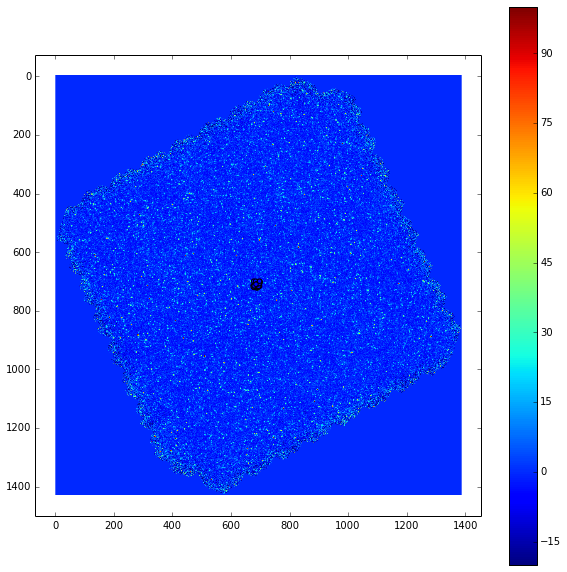

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(prior250.im, vmin=-20,vmax=100)
plt.colorbar()
plt.scatter(prior250.sx,prior250.sy)

In [13]:
print dir(posterior)
print posterior.stan_fit[:,0,-1]

['Rhat', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'convergence_stats', 'covariance_sparse', 'n_eff', 'nsrc', 'param_names', 'quantileGet', 'stan_fit']
[-498.4994677  -498.05351987 -501.53450522 -497.86028073 -497.41830384
 -508.50948739 -507.63136784 -518.66314968 -504.59883795 -508.12994691
 -516.62831898 -510.54571287 -493.17473915 -498.66951652 -495.21050397
 -494.50127033 -505.34197672 -511.6771379  -512.3013591  -509.45700021
 -505.05795949 -516.10006354 -516.22293574 -505.60009706 -516.65162367
 -521.24974187 -522.58805325 -520.03640934 -501.71790359 -492.08387135
 -492.73817458 -501.35904689 -525.05397398 -508.62689292 -496.09969883
 -504.8190505  -501.76257937 -503.85335167 -513.0352533  -509.5754143
 -502.37684508 -491.62129748 -502.28430593 -509.68742782 -509.8428969
 

In [14]:

#----output folder-----------------
output_folder='./'

#Folder containing prior input catalogue
folder='../../test_files/'
#prior catalogue
prior_cat='lacey_07012015_MillGas.ALLVOLS_cat_PSW_COSMOS_test.fits'

hdulist = fits.open(folder+prior_cat)
fcat=hdulist[1].data
hdulist.close()
f_src=fcat['S100']#100 micron flux
f_psw=fcat['S250']
sgood=f_src >0.050

inra=fcat['RA'][sgood]
indec=fcat['DEC'][sgood]
f_src=f_src[sgood]
f_psw=f_psw[sgood]
sgood=(inra > prior250.tile[0,0]-prior250.buffer_size) & (inra < prior250.tile[0,2]+prior250.buffer_size) & (indec > prior250.tile[1,0]-prior250.buffer_size) & (indec < prior250.tile[1,2]+prior250.buffer_size)

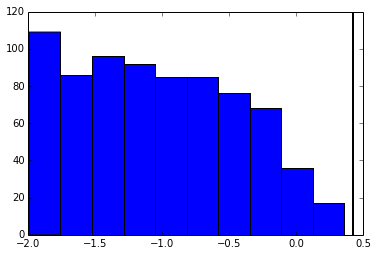

In [61]:
plt.hist(posterior.stan_fit[:,0,39])
plt.axvline(x=np.log10(f_psw[sgood][39]), linewidth=2, color='k')


In [52]:
for i in range(0,prior250.nsrc):
    print i,f_psw[sgood][i],prior250.sx[i],prior250.sy[i]

0 7.57895 692.0 720.000003877
1 0.945916 682.666659428 719.666670286
2 0.937712 685.666661755 702.666657102
3 0.650984 697.00000389 716.333334371
4 13.0562 693.666667959 709.999996124
5 1.39447 676.999988362 699.333321178
6 6.44018 696.666670288 701.999989911
7 1.18187 684.333327387 704.999992244
8 0.447346 683.999993795 721.000004653
9 0.586796 692.333333594 712.666664841
10 1.67064 695.000002325 706.9999938
11 0.460022 694.000001552 702.666657095
12 13.4408 684.666660976 718.666669512
13 0.861668 694.666668741 710.333329703
14 0.734839 684.666660988 718.333335915
15 1.22793 677.666655543 720.666671064
16 0.332628 689.333331265 722.666672613
17 0.502569 676.999988361 714.333332816
18 0.11958 698.333338245 700.333321959
19 5.05163 689.666664849 720.000003894
20 6.37049 684.66666098 703.666657878
21 3.51493 688.666664097 716.666667951
22 30.4221 698.333338245 703.333324286
23 5.34851 687.999996892 711.333330484
24 44.7503 685.666661755 704.666658654
25 3.63471 675.666653994 714.33333281

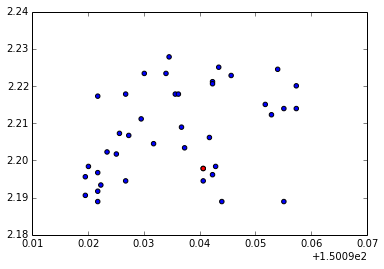

In [47]:
plt.scatter(prior250.sra,prior250.sdec)
plt.scatter(prior250.sra[24],prior250.sdec[24], c='r')

In [22]:
cat=xid_mod.create_XIDp_SPIREcat_nocov(posterior,prior250,prior350,prior500)

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.decorators]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.


In [25]:
print cat[1].data['flux250']

[ 0.39275295  0.47496298  0.46361962  0.54965138  0.50808662  0.47624096
  0.5241372   0.51367348  0.44890103  0.48551089  0.46194184  0.47699827
  0.53635412  0.44457045  0.48869047  0.48898715  0.45286161  0.48809898
  0.52967685  0.5883022   0.44576797  0.46916389  0.51955581 -0.82163155
  0.47929475  0.48791993  0.57315558  0.5196293   0.52991664  0.53970295
  0.48545933  0.44977358  0.44397497  0.48504943  0.49491251  0.42872179
  0.45865333  0.47456965  0.51822424 -1.08161628]


In [26]:
def yrep_map(prior,fvec):
    from scipy.sparse import coo_matrix
    

    x_range=np.max(prior.sx_pix)-np.min(prior.sx_pix)
    y_range=np.max(prior.sy_pix)-np.min(prior.sy_pix)
    f=coo_matrix((fvec, (range(0,prior.nsrc+1),np.zeros(prior.nsrc+1))), shape=(prior.nsrc+1, 1))
    A=coo_matrix((prior.amat_data, (prior.amat_row, prior.amat_col)), shape=(prior.snpix, prior.nsrc+1))
    rmap_temp=(A*f)
    pred_map=np.empty_like(prior.im)
    pred_map[:,:]=0.0#prior.im
    pred_map_noise=np.empty_like(prior.im)
    pred_map_noise[:,:]=0.0#prior.im
    pred_map[prior.sy_pix,prior.sx_pix]=np.asarray(rmap_temp.todense()).reshape(-1)#+np.random.randn(prior.snpix)*prior.snim
    pred_map_noise[prior.sy_pix,prior.sx_pix]=np.asarray(rmap_temp.todense()).reshape(-1)+np.random.randn(prior.snpix)*prior.snim

    return pred_map,pred_map_noise

In [74]:
fvec=np.power(10.0,posterior.stan_fit[3,0,0:41])
fvec[-1]=np.log10(fvec[-1])
print fvec
rep_map=yrep_map(prior250,fvec)

[  1.08796918e-02   1.93497229e-01   1.63850069e-02   2.78106975e-01
   1.87862041e+00   4.80767876e+01   2.90349623e+00   5.78606399e+01
   2.11149518e+01   6.06045885e-02   2.29844498e+00   1.37004385e+02
   3.81684633e-01   3.05238430e-01   6.38944235e-01   3.39464623e-02
   5.96827981e-02   9.03691321e-02   7.09046745e-02   3.53115027e-02
   6.08868544e-01   4.62412930e+00   2.25822408e+01   1.79599523e-02
   2.11823195e+00   5.15367878e-02   4.47129455e-01   4.97971186e-01
   4.19894560e+01   1.40174571e-02   1.77173241e-01   7.92208170e+01
   4.44017923e-01   3.48642376e+00   2.97327280e+01   1.94451560e-01
   2.30094678e-02   3.82409626e-02   2.37817486e-02   5.56186689e-01
  -2.18522723e-01]


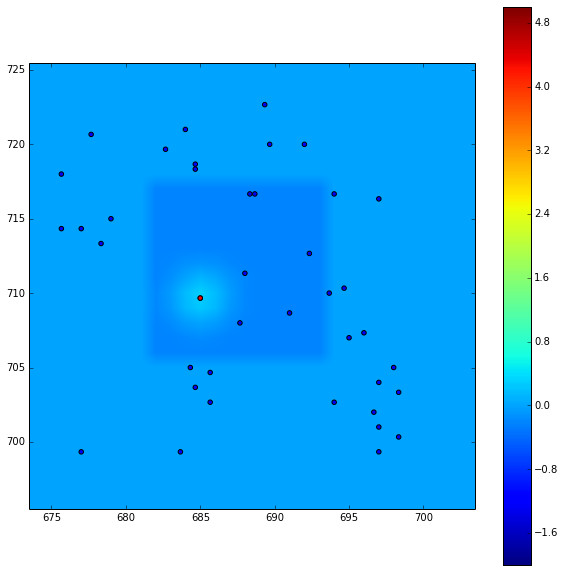

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(rep_map[0], vmin=-2,vmax=5)
plt.xlim(np.mean(prior250.sx)-15,np.mean(prior250.sx)+15)
plt.ylim(np.mean(prior250.sy)-15,np.mean(prior250.sy)+15)

plt.colorbar()
plt.scatter(prior250.sx,prior250.sy)
plt.scatter(prior250.sx[39],prior250.sy[39],c='r')

This is exploring the $250_{\mathrm{\mu m}}$ map

(array([ 81.,  70.,  61.,  73.,  92.,  59.,  71.,  78.,  83.,  82.]),
 array([-1.99264224, -1.49367537, -0.9947085 , -0.49574164,  0.00322523,
         0.5021921 ,  1.00115896,  1.50012583,  1.99909269,  2.49805956,
         2.99702643]),
 <a list of 10 Patch objects>)

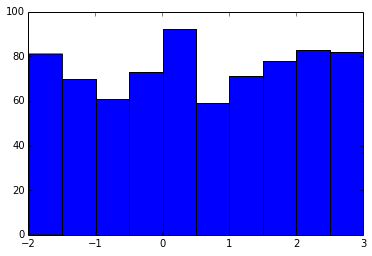

In [79]:
plt.hist(posterior.stan_fit[:,0,24])


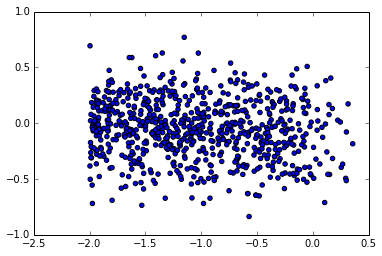

In [77]:
plt.scatter(posterior.stan_fit[:,0,39],posterior.stan_fit[:,0,40])